In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans

from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

## Read the data

In [2]:
data=pd.read_csv('data/abcnews-date-text.csv',error_bad_lines=False,usecols=['headline_text'])
data.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186018 entries, 0 to 1186017
Data columns (total 1 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   headline_text  1186018 non-null  object
dtypes: object(1)
memory usage: 9.0+ MB


## Deleting Duplicate headlines

In [4]:
data[data['headline_text'].duplicated()].sort_values('headline_text').head(8)

,headline_text
116298,10 killed in pakistan bus crash
676423,110 with barry nicholls
748629,110 with barry nicholls
911080,110 with barry nicholls
897042,110 with barry nicholls episode 15
898353,110 with barry nicholls episode 16
913014,110 with barry nicholls episode 18
915312,110 with barry nicholls episode 19


In [5]:
data=data.drop_duplicates('headline_text')

In [6]:
data.shape

(1155838, 1)

## Data preprocessing

When doing NLP, words must be converted into vectors that ML algorithms can use. This process of converting words into vectors is said to be `embedding`/`vectorization`

### TF-IDF

In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf-idf value increases proportionally to the number of times a word appears in the document and is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general.

**Removing Stopwords and Punctuations**

In [7]:
stop_words=stopwords.words('english')
punc=['.',',','"',"'",'!',':',';','(',')','[',']','{','}',"%"]
stop_words=stop_words+punc
X=data['headline_text'].values

In [8]:
tfidf_vect=TfidfVectorizer(stop_words=stop_words)
X_train_1=tfidf_vect.fit_transform(X)

In [9]:
word_features=tfidf_vect.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

101786
['agforce', 'agforces', 'agfutures', 'agged', 'agger', 'aggie', 'aggravate', 'aggravated', 'aggravates', 'aggravating', 'aggregate', 'aggregation', 'aggregator', 'aggres', 'aggression', 'aggressive', 'aggressively', 'aggressiveness', 'aggressor', 'aggressors', 'aggrevates', 'aggrieved', 'aggro', 'aggs', 'aghan', 'aghanistan', 'aghast', 'agi', 'agile', 'agility', 'agim', 'agincourt', 'aging', 'aginst', 'aginvest', 'agirculturer', 'agirus', 'agist', 'agisted', 'agisting', 'agistment', 'agitate', 'agitated', 'agitating', 'agitation', 'agitator', 'agius', 'agl', 'agland', 'aglive', 'agls', 'agm', 'agminister', 'agms', 'agnel', 'agnelli', 'agnes', 'agnetha', 'agnew', 'agnieszka', 'agnorth', 'agnostic', 'agnostics', 'agnsw', 'agnus', 'ago', 'agog', 'agonise', 'agonises', 'agonising', 'agonisingly', 'agonist', 'agonizing', 'agonizingly', 'agony', 'agora', 'agoraphobes', 'agoraphobia', 'agoraphobic', 'agostino', 'agpolicy', 'agquip', 'agr', 'agra', 'agrarian', 'agrc', 'agre', 'agree', '

### Stemming
Stemming is the process of reducing a word into its stem, i.e. its root form. The root form is not necessarily a word by itself, but it can be used to generate words by concatenating the right suffix. For example, the words fish, fishes and fishing all stem into fish, which is a correct word. On the other side, the words study, studies and studying stems into studi, which is not an English word

### Tokenization
Process of breaking the sentences into words and punctuations.

In [10]:
stemmer=SnowballStemmer('english')
tokenizer=RegexpTokenizer(r'[a-zA-Z]+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [11]:
tfidf_vect2=TfidfVectorizer(stop_words=stop_words,tokenizer=tokenize)
X_train_2=tfidf_vect2.fit_transform(X)
word_features2=tfidf_vect2.get_feature_names()
print(len(word_features2))
print(word_features2[:50])

70278
['aa', 'aaa', 'aaahhh', 'aac', 'aacc', 'aaco', 'aacta', 'aad', 'aadhaar', 'aadmi', 'aag', 'aagaard', 'aagard', 'aah', 'aalto', 'aam', 'aamer', 'aami', 'aamodt', 'aandahl', 'aant', 'aap', 'aapa', 'aapt', 'aar', 'aaradhna', 'aardman', 'aardvark', 'aargau', 'aaron', 'aaronpaul', 'aarwun', 'aat', 'ab', 'aba', 'abaaoud', 'ababa', 'aback', 'abacus', 'abadi', 'abadon', 'abal', 'abalon', 'abalonv', 'abama', 'abandon', 'abandond', 'abandong', 'abar', 'abat']


**Restricting features to 1000**

In [12]:
tfidf_vect3=TfidfVectorizer(stop_words=stop_words,tokenizer=tokenize,max_features=1000)
X_train_3=tfidf_vect3.fit_transform(X)
words=tfidf_vect3.get_feature_names()
print(len(words))
print(words[:50])

1000
['abbott', 'abc', 'aborigin', 'abus', 'access', 'accid', 'accus', 'across', 'act', 'action', 'ad', 'address', 'adelaid', 'admit', 'affect', 'afghan', 'afghanistan', 'afl', 'africa', 'age', 'agre', 'agreement', 'ahead', 'aid', 'aim', 'air', 'airport', 'alcohol', 'alert', 'alic', 'alleg', 'allow', 'alp', 'amid', 'andrew', 'anger', 'anim', 'announc', 'anoth', 'anti', 'anzac', 'appeal', 'appear', 'appoint', 'approv', 'area', 'arm', 'armi', 'arrest', 'arriv']


## K-means clustering
**Elbow method to select the number of clusters**

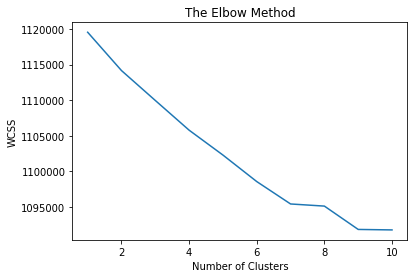

In [14]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_train_3)
    # kmeans.inertia : Sum Squared Errors by nearest cluster center
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Running the above cell takes lots of time. To choose the number of clusters via Elbow method, it is ideal to choose a value between 6 and 8(mostly 7) as it is the point where the bent is formed first.

### 3 Clusters

In [15]:
kmeans=KMeans(n_clusters=3,n_init=20,n_jobs=1)
kmeans.fit(X_train_3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
#returns the index of frequent words i.e. 25 words 
common_words=kmeans.cluster_centers_.argsort()[:,-1:-26:-1]

In [29]:
for num,centroid in enumerate(common_words):
    print(str(num)," : ",', '.join(words[word] for word in centroid))

0  :  say, plan, win, call, council, us, australia, fire, back, govt, report, australian, kill, court, fund, warn, water, urg, nsw, get, take, chang, open, death, interview
1  :  polic, man, charg, murder, assault, court, death, face, investig, arrest, drug, jail, car, stab, attack, miss, crash, shoot, woman, probe, search, offic, kill, die, child
2  :  new, zealand, law, year, plan, open, get, name, council, polic, centr, hospit, home, set, australia, deal, hope, appoint, announc, look, say, south, chief, minist, govt


### More clusters can be formed, a decent solution would be to use n_clusters = 7 for good result